In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [26]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
# Normalize images and add channel dimension
train_images = train_images[..., np.newaxis] / 255.0  # Normalize training images and add channel dimension using np.newaxis to convert grayscale images from shape (28, 28) to (28, 28, 1), necessary for CNN input.
test_images = test_images[..., np.newaxis] / 255.0    # Normalize test images and add channel dimension using np.newaxis to convert grayscale images from shape (28, 28) to (28, 28, 1), necessary for CNN input.

In [28]:
# Split train set for training and validation
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [29]:
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)
print(val_images.shape,val_labels.shape)

(48000, 28, 28, 1) (48000,)
(10000, 28, 28, 1) (10000,)
(12000, 28, 28, 1) (12000,)


In [30]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

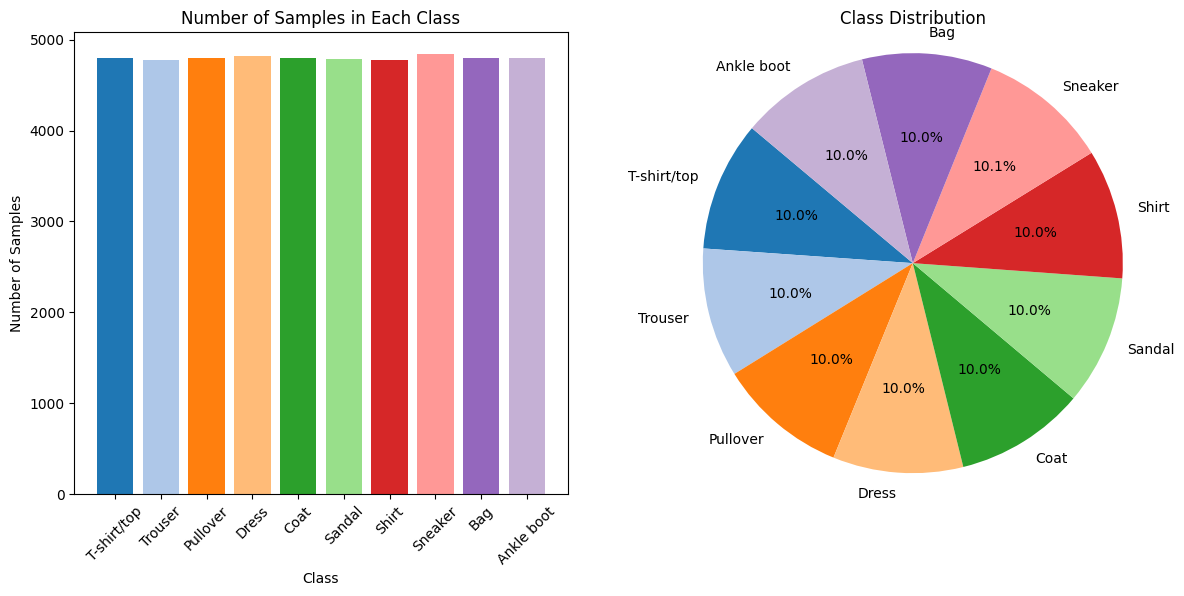

In [31]:
# Colors for consistent visualization
colors = plt.cm.tab20.colors  # Use tab20 colormap for consistent colors

# Visualization: Class distribution
plt.figure(figsize=(14, 6))

# Bar chart for class distribution
plt.subplot(1, 2, 1)
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(class_names, counts, color=colors)  # Bar chart for class distribution
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Pie chart for class distribution
plt.subplot(1, 2, 2)
plt.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=colors)  # Pie chart for class distribution
plt.axis('equal')  # Equal aspect ratio for pie chart
plt.title('Class Distribution')

plt.show()

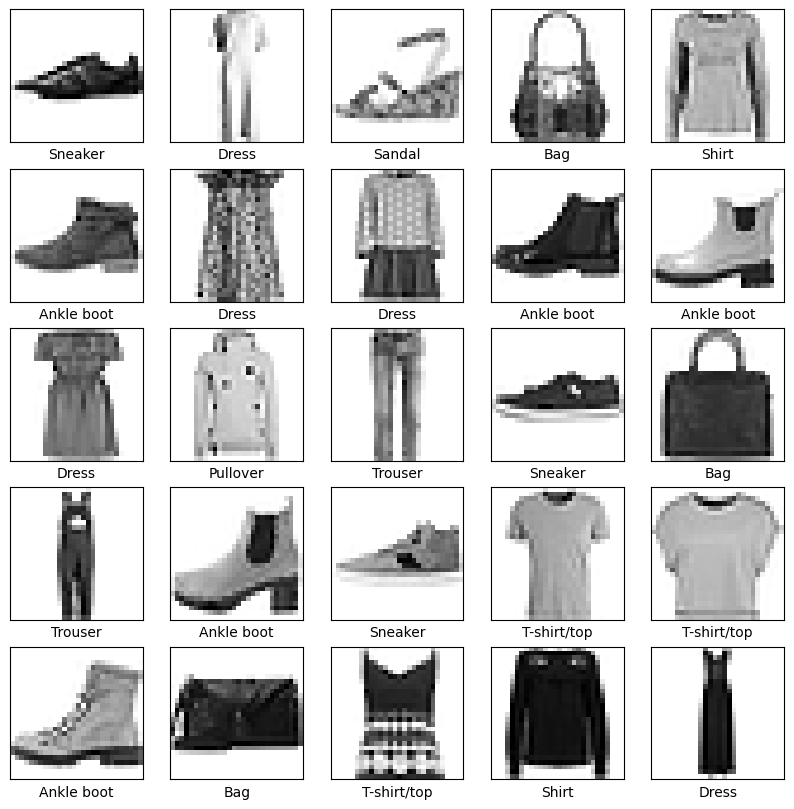

In [32]:
# Visualization: Some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)  # Display image
    plt.xlabel(class_names[train_labels[i]])  # Display label
plt.show()


In [33]:
# Define the embedding dimension
embedding_dim = 64

# Define the model
input_layer = Input(shape=(28, 28, 1))  # Input layer with shape (28, 28, 1) for grayscale images
x = Conv2D(32, (3, 3), activation='relu')(input_layer)  # First convolutional layer with 32 filters of size 3x3
x = MaxPooling2D((2, 2))(x)  # Max pooling layer with pool size 2x2
x = Conv2D(64, (3, 3), activation='relu')(x)  # Second convolutional layer with 64 filters of size 3x3
x = MaxPooling2D((2, 2))(x)  # Max pooling layer with pool size 2x2
x = Flatten()(x)  # Flatten layer to convert 2D matrix to a vector
embedding_output = Dense(embedding_dim, activation='linear', name='embedding_layer')(x)  # Embedding layer with linear activation
output_layer = Dense(10, activation='softmax')(embedding_output)  # Output layer with 10 units for 10 classes and softmax activation

model = Model(inputs=input_layer, outputs=output_layer)  # Define the model with input and output layers


In [34]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # Compile the model with Adam optimizer and sparse categorical cross-entropy loss

In [35]:
# Print the model summary
model.summary()  # Print model summary to display architecture and parameters

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Dense)         │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_data=(val_images, val_labels))  # Train the model for 50 epochs with batch size of 64

Epoch 1/50
 73/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5184 - loss: 1.4253

W0000 00:00:1718514434.906834     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


740/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.7061

W0000 00:00:1718514437.152973     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7510 - loss: 0.7031 - val_accuracy: 0.8682 - val_loss: 0.3681
Epoch 2/50
 64/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.3748

W0000 00:00:1718514437.852283     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8750 - loss: 0.3489 - val_accuracy: 0.8824 - val_loss: 0.3216
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8908 - loss: 0.3028 - val_accuracy: 0.8946 - val_loss: 0.2988
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9002 - loss: 0.2757 - val_accuracy: 0.8967 - val_loss: 0.2842
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9091 - loss: 0.2497 - val_accuracy: 0.9017 - val_loss: 0.2678
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9191 - loss: 0.2253 - val_accuracy: 0.9032 - val_loss: 0.2671
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9243 - loss: 0.2135 - val_accuracy: 0.8998 - val_loss: 0.2833
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9304 - loss: 0.1935 - val_accuracy: 0.9021 - val_loss: 0.2680
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9315 - loss: 0.1856 - val_accuracy: 0.9045 - val_

In [37]:
# Create a new model that outputs the embeddings
embedding_model = Model(inputs=model.input, outputs=model.get_layer('embedding_layer').output)  # Model for extracting embeddings

In [38]:
# Generate embeddings for the test images
test_embeddings = embedding_model.predict(test_images)  # Generate embeddings for test images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
# Perform K-means clustering on the embeddings
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)  # Initialize K-means with 10 clusters and explicitly set n_init to 10
kmeans.fit(test_embeddings)  # Fit K-means to the test embeddings
test_clusters = kmeans.predict(test_embeddings)  # Predict cluster for each test embedding

In [40]:
# Function to recommend items based on cluster
def recommend(item_index, num_recommendations=5):
    item_cluster = test_clusters[item_index]  # Get the cluster of the specified item
    cluster_indices = np.where(test_clusters == item_cluster)[0]  # Find indices of items in the same cluster
    cluster_distances = np.linalg.norm(test_embeddings[cluster_indices] - test_embeddings[item_index], axis=1)  # Compute distances within the cluster
    nearest_indices = cluster_indices[np.argsort(cluster_distances)[:num_recommendations]]  # Get nearest items in the cluster
    return nearest_indices


In [41]:
# Function to display recommendations
def display_recommendations(item_index, num_recommendations=5):
    recommended_indices = recommend(item_index, num_recommendations)  # Get recommendations

    # Plot the query image and its recommendations
    plt.figure(figsize=(10, 2))
    plt.subplot(1, len(recommended_indices) + 1, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[item_index].squeeze(), cmap=plt.cm.binary)  # Display query image
    plt.xlabel("Query")

    for i, rec_index in enumerate(recommended_indices):
        plt.subplot(1, len(recommended_indices) + 1, i + 2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(test_images[rec_index].squeeze(), cmap=plt.cm.binary)  # Display recommended image
        plt.xlabel(f"Rec {i+1}")

    plt.show()

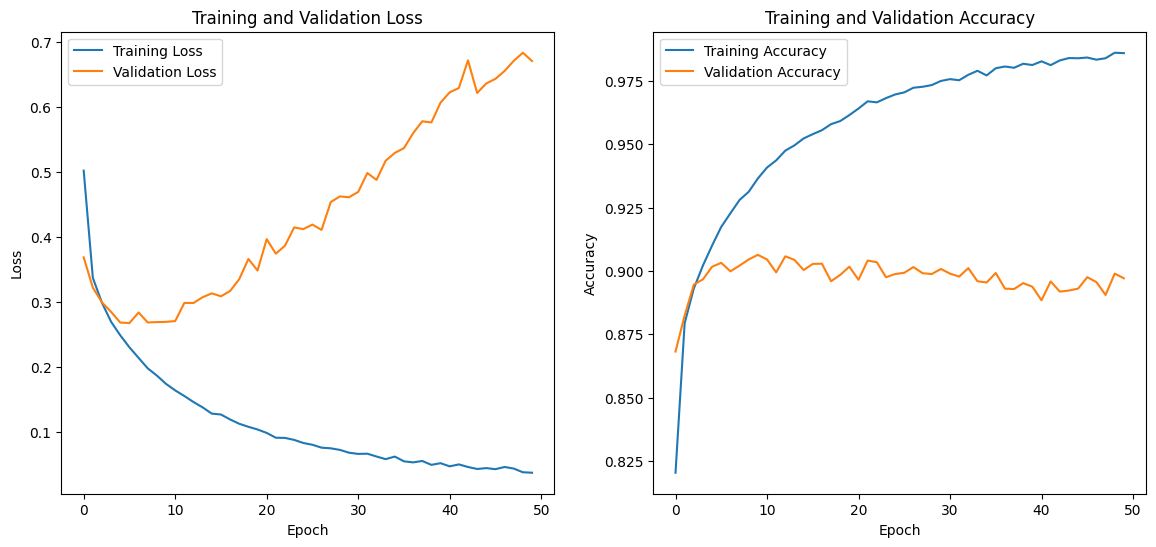

In [42]:
# Visualization: Training history
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)  # Evaluate model on test set
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 - 1s - 2ms/step - accuracy: 0.8988 - loss: 0.6878
Test Loss: 0.6878092288970947
Test Accuracy: 0.8988000154495239


W0000 00:00:1718514537.587091     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


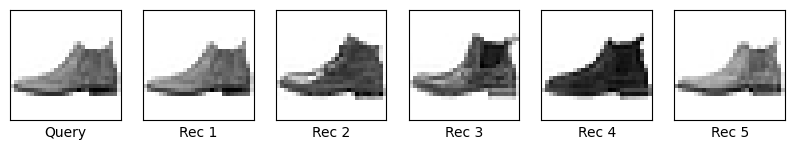

In [44]:
# Example: Recommend items similar to the first item in the test set
display_recommendations(item_index=0, num_recommendations=5)  

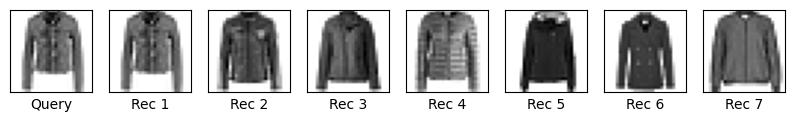

In [45]:
display_recommendations(item_index=10, num_recommendations=7)  

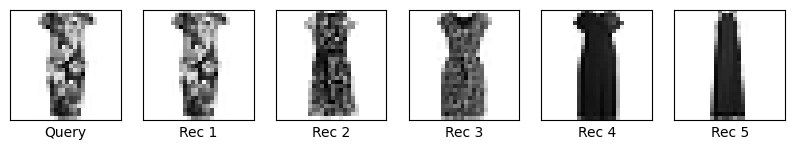

In [46]:
display_recommendations(item_index=100, num_recommendations=5) 

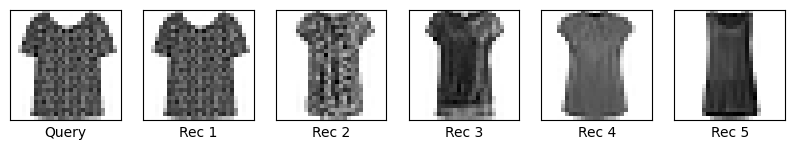

In [47]:
display_recommendations(item_index=1000, num_recommendations=5)  

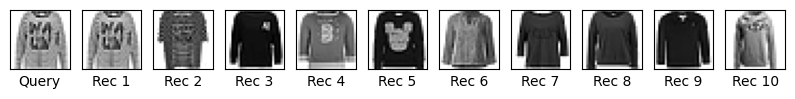

In [48]:
display_recommendations(item_index=500, num_recommendations=10) 

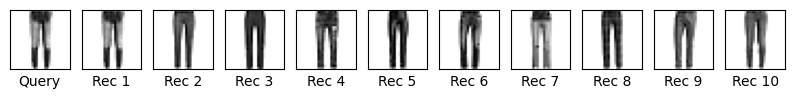

In [49]:
display_recommendations(item_index=3, num_recommendations=10) 

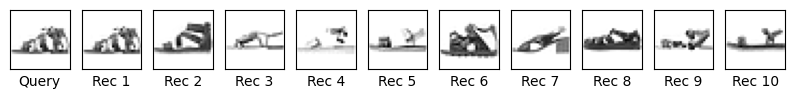

In [50]:
display_recommendations(item_index=11, num_recommendations=10) 

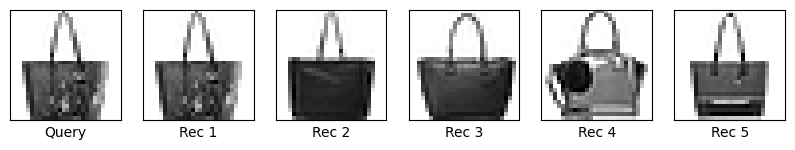

In [51]:
display_recommendations(item_index=256, num_recommendations=5)

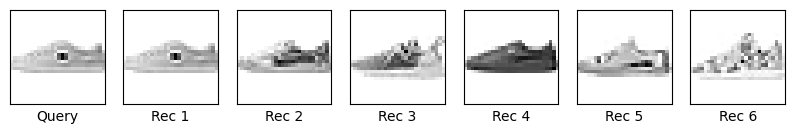

In [52]:
display_recommendations(item_index=603, num_recommendations=6) 